## Titanic Compitition from Kaggle Using Python 
       
       By:  Muluemebet 
            Aug, 2017

### Important libraries 

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline  

### Read the data 

In [2]:
train= pd.read_csv("train.csv")  # load training  data 

In [3]:
test= pd.read_csv("test.csv") # load test data

In [4]:
test_survived= pd.read_csv("gender_submission.csv")

## 1) Data Exploration and Preprocesing 

In [5]:
train.head(3)  # the first four observations of the training dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test_survived.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [8]:
# the dimension of the dataset 
print("Training data dimension:", train.shape)
print("Test data dimension:", test.shape) 
print("Test output:", test_survived.shape)

Training data dimension: (891, 12)
Test data dimension: (418, 11)
Test output: (418, 2)


Now, let us merge the test data and its outcome into a single data frame.

In [9]:
test_m= pd.merge(test_survived,test, how="inner", on="PassengerId")
test_m.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
test_m.shape

(418, 12)

### a) Identifing missing values 

#### Trianing data 

In [11]:
train.info()   # info about the variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the above information we can easly see that there are missing values in the collumn of Age, Cabin and Embarked. We can also visualize the missing values using heatmap as follow:


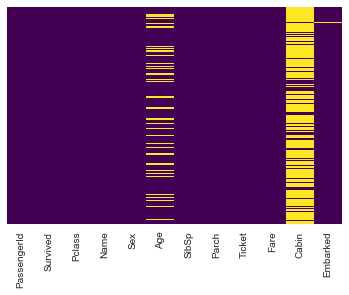

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

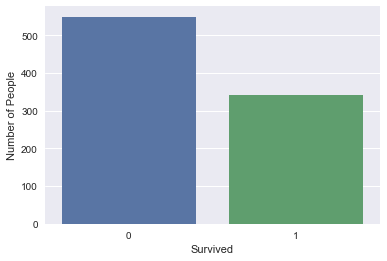

In [13]:
sns.countplot(x="Survived", data= train)   #  number of survived and non-survived 
plt.ylabel("Number of People")

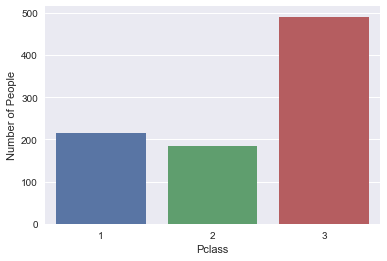

In [14]:
sns.countplot(x="Pclass", data= train) # number of people in each class type 
plt.ylabel("Number of People")

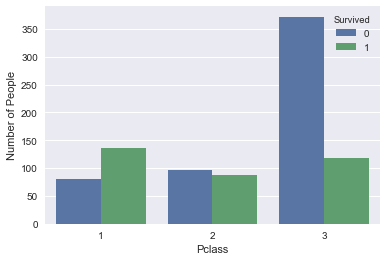

In [11]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.ylabel("Number of People")

**Note**: Majority of people in the first class was survived and majority of the 3rd class are not survived 

Let us see the frequency of age  

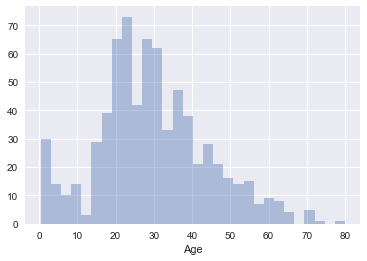

In [15]:
sns.distplot(train["Age"].dropna(), kde=False, bins=30, )

In [13]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Age vs. class 

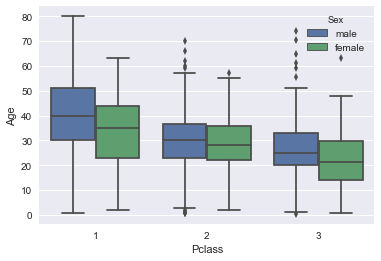

In [16]:
sns.boxplot(x="Pclass", y="Age",hue="Sex", data=train)

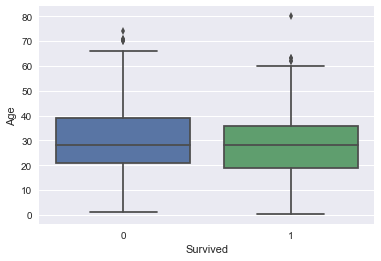

In [30]:
sns.boxplot(x="Survived", y= "Age", data=train)

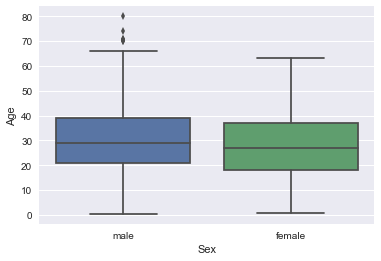

In [17]:
sns.boxplot(x="Sex", y="Age", data=train)

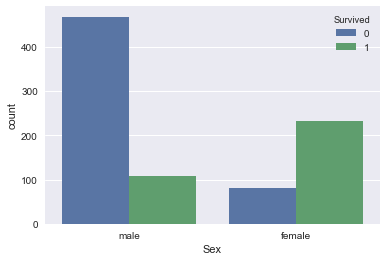

In [17]:
sns.countplot(x="Sex", hue= "Survived", data=train)

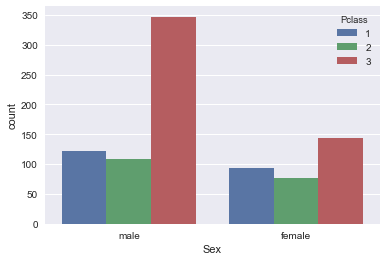

In [18]:
sns.countplot(x="Sex", hue= "Pclass", data=train)

### Test data 
Test data has missing value in the columns of age, fare and cabin. Afterwards we use the merged test_m data as test data. 

In [19]:
test_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


### b)  Data Cleaning
The age of about 177 people was missing form training data. Instead of ignoring the missing values we can fill the average age by passenger class or we can use other approach that can improve our prediction 

In [20]:
train.groupby(by ="Pclass")["Age"].mean()  # the average age for each passenger class 

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [21]:
# the average age for each passenger class and dender 
train.groupby(by =["Pclass", "Sex"])["Age"].mean()  

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [22]:
def impute_age(col):
    Age= col[0]
    Pclass=col[1]
    Sex=col[2]
    if pd.isnull(Age):
        if Sex=="female":
            if Pclass==1:
                return 35
            elif Pclass==2:
                return 29
            else:
                return 22
        else:
            if Pclass==1:
                return 41
            elif Pclass==2:
                return 31
            else:
                return 27
    else:
        return Age 

In [23]:
# impute the missing age using the above function 
train["Age"]= train[["Age", "Pclass", "Sex"]].apply(impute_age, axis=1)

**Apply the same fuction to impute the missing values of age in the test data set.**

In [24]:
test_m["Age"]= test_m[["Age", "Pclass", "Sex"]].apply(impute_age, axis=1)

In [25]:
test_m.info() # Fare and Cabin still have mising values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


** Filling missing fair for test data set**


In [26]:
# mean fair 
meanFair=test_m["Fare"].mean()
meanFair=float(str(np.round(meanFair, 2)))
meanFair

35.63

In [27]:
test_m["Fare"].fillna(value= meanFair, inplace=True) # fill with the mean value 

### c) Variable selection 
The predictor variables choosen are Pclass, Sex, Age, SibSp, Parch, Far and  Embarked.  The variables PassengerId, name, ticket may not give information about survival and ignored to be included in the model. The variable Cabin will not be included in the model becuase it has large portion of missing value.

In [28]:
# The names of the columns of the training data 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
# drop columns from the training data
train.drop(["Name", "Ticket","Cabin" ], axis=1, inplace=True)

In [30]:
train["Embarked"].dropna().isnull().value_counts()

False    889
Name: Embarked, dtype: int64

In [31]:
# clean other misssing values in the data
#Make sure Cabin column is droped before this operation. Otherwise many rows will be deleted 
train.dropna(axis=0,how='any', inplace=True)

In [32]:
train.shape

(889, 9)

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [34]:
test_m.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
# drop columns from the test data
test_m.drop(["Name", "Ticket","Cabin" ], axis=1, inplace=True)

In [36]:
test_m.shape

(418, 9)

### d) Creating dummy variables 
The catagorical variables we want to include in the model are sex and embarked. We need to convert into numerical by creating dummy variables.

In [37]:
# creating dummy variables for training data 
sex_train= pd.get_dummies(train["Sex"], drop_first=True)
embarked_train= pd.get_dummies(train["Embarked"], drop_first=True)

In [38]:
# add dummy variables 
train= pd.concat([train, sex_train,embarked_train], axis=1)

In [39]:
#remove catagorical variables
train.drop(["Sex", "Embarked"], axis=1, inplace=True)
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [40]:
# creating dummy variables for test data 
sex_test= pd.get_dummies(test_m["Sex"], drop_first=True)
embarked_test= pd.get_dummies(test_m["Embarked"], drop_first=True)

In [41]:
# add dummy variables 
test_m= pd.concat([test_m, sex_test,embarked_test], axis=1)


In [42]:
# remove catagorical variables 
test_m.drop(["Sex", "Embarked"], axis=1, inplace=True)
test_m.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0


## 2) Modelling and Evaluation 
One the  data is prepared, it is time to proceed to the next step.


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
X= train.drop(["PassengerId","Survived"], axis=1)
y= train["Survived"]

In [45]:
# train the model 
logmodel=LogisticRegression()
logmodel.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# predict for test data
X_test= test_m.drop(["PassengerId","Survived"], axis=1)
pred=logmodel.predict(X_test)

** Evaluate the model **

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print("Confusion Matrix \n",confusion_matrix(test_m["Survived"], pred))
print("\nClassification Report \n", classification_report(test_m["Survived"], pred))

Confusion Matrix 
 [[256  10]
 [  8 144]]

Classification Report 
              precision    recall  f1-score   support

          0       0.97      0.96      0.97       266
          1       0.94      0.95      0.94       152

avg / total       0.96      0.96      0.96       418



In [63]:
Submission=pd.concat([test_m["PassengerId"], pd.DataFrame(pred, columns=["Survived"])], axis=1)

In [66]:
# Survival prediction of test data in the form of submission format 
Submission.to_csv("Submission_file.csv",index=False)